In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

train = pd.read_csv('./Desktop/Kaggle_Study/Jicbang/train.csv')
test = pd.read_csv('./Desktop/Kaggle_Study/Jicbang/test.csv')
subway = pd.read_csv('./Desktop/Kaggle_Study/Jicbang/Subways.csv')
school = pd.read_csv('./Desktop/Kaggle_Study/Jicbang/Schools.csv')


key:  Primary key

apartment_id: 아파트 ID

city; Seoul: 1 Busan: 0

transaction_year_month:  실거래가 발생 년월 : yyyymm

transaction_date:   실거래가 발생일 dd ~ dd

year_of_completion:   아파트 준공 년도, 입주년

exclusive_use_area:   전용면적

floor:   층

latitude:   latitude
longitude:  longitude

address_ by_law:   법정동코드 (앞2자리: 시/도, 앞5자리: 시/군/구, 앞8자리: 읍/면/동)
                    법정동 코드 (10자리) : 법적주소
                    시도(2)+시군구(3)+읍면동(3)+리(2)
                    보다 자세한 법정동 코드체계는 아래 행정표준코드관리시스템 > 법정동코드목록조회에서 찾아보실 수 있습니다. 
     https://www.code.go.kr/stdcode/regCodeL.do
        
total_parking_capacity_in_site:   아파트 단지내 총 주차대수

total_household_count_in_sites:    아파트 단지 내 총세대수

apartment_building_count_in_sites:    아파트 단지 내 총 동수

tallest_building_in_sites:      아파트 단지 내 최고층

lowest_building_in_sites:    아파트 단지 내 최저층 동의 층수

heat_type:     난방방식 : 개별난방(individual), 중앙난방(central), 지역난방(district)

heat_fuel:    난방연료 : 도시가스(gas), 열병합(cogeneration)

room_id:      평형 ID

            (평형 =(전용면적㎡+ 주거공용면적㎡)*0.3025))
         (평형=3.3058㎡)
         
supply_area:      공급면적 (= 전용면적 + 주거공용면적)

total_household_count_of_area_type:      평형의 총세대수

room_count1;        방 수

bathroom_count:     욕실 수

front_door_structure:      현관구조 : 복도식(corridor), 계단식(stairway), 복합식(mixed)

transaction_real_price:     실거래가 (단위: 만원) 


subways.csv


station_id:     지하철역 ID

latitude:    latitude

longitude:     longitude

subway_line:
            지하철 노선
            서울 : 1 ~ 9 (1호선 ~ 9호선), KJ (경의중앙선), US (우의신설경전철), AP (공항철도), KC (경춘선), DL (분당선), ND (신분당선)
            부산 : B1 ~ B4 (1호선 ~ 4호선), BD (동해선), BK (부산김해경전철)
            복수일 경우 : 환승역
            
address_by_law:     법정동코드 (앞2자리: 시/도, 앞5자리: 시/군/구, 앞8자리: 읍/면/동)



schools.csv

school_code:   학교 코드

latitude:   latitude

longitude:    longitude

school_class:      초등학교(elementary school), 중학교( middle school), 고등학교(high school)

operation_type:     운영주체 : 국립(national), 공립(public), 사립(private)

highschool_type:    고등학교 구분 : 
일반고등학교 (general), 자율고등학교 ( autonomous), 특성화고등학교 (specialized), 특수목적고등학교 (objective)

gender:    남학교(male), 여학교(female), 남녀공학(both = coeducation)

foundation_date:     설립일

address_by_law:        법정동코드 (앞2자리: 시/도, 앞5자리: 시/군/구, 앞8자리: 읍/면/동)

In [2]:
train.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


In [3]:
test.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,462533,3751,1,200912,21~31,1984,83.58,14,37.519926,127.052515,...,15.0,district,cogeneration,6648,107.19,2,3.0,1.0,corridor,0
1,764018,14029,1,201304,1~10,1968,107.17,10,37.572215,126.987643,...,8.0,individual,gas,46184,107.17,10,0.0,0.0,corridor,0
2,813528,12304,1,201309,21~30,1968,36.17,6,37.570067,127.010640,...,4.0,individual,gas,45540,39.66,58,2.0,1.0,stairway,0
3,845097,22241,1,201312,1~10,2007,45.67,8,37.556938,126.859255,...,15.0,individual,gas,19069,87.11,1,3.0,2.0,stairway,0
4,856338,316,1,201401,1~10,1988,41.85,4,37.652256,127.082003,...,5.0,individual,gas,704,56.70,90,2.0,1.0,stairway,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 25 columns):
key                                   1601458 non-null int64
apartment_id                          1601458 non-null int64
city                                  1601458 non-null int64
transaction_year_month                1601458 non-null int64
transaction_date                      1601458 non-null object
year_of_completion                    1601458 non-null int64
exclusive_use_area                    1601458 non-null float64
floor                                 1601458 non-null int64
latitude                              1601458 non-null float64
longitude                             1601458 non-null float64
address_by_law                        1601458 non-null int64
total_parking_capacity_in_site        1509645 non-null float64
total_household_count_in_sites        1601458 non-null int64
apartment_building_count_in_sites     1601458 non-null int64
tallest_building_in_site

In [72]:
train.isnull().sum()

key                                       0
apartment_id                              0
city                                      0
transaction_year_month                    0
transaction_date                          0
year_of_completion                        0
exclusive_use_area                        0
floor                                     0
latitude                                  0
longitude                                 0
address_by_law                            0
total_parking_capacity_in_site        91813
total_household_count_in_sites            0
apartment_building_count_in_sites         0
tallest_building_in_sites                 9
lowest_building_in_sites                  9
heat_type                              2017
heat_fuel                              9667
room_id                                   0
supply_area                               0
total_household_count_of_area_type        0
room_count                              691
bathroom_count                  

In [37]:
subway.describe()

,station_id,latitude,longitude,address_by_law
count,405.000000,405.000000,405.000000,3.960000e+02
mean,381.777778,36.832403,127.617367,1.599954e+09
std,290.534741,1.090536,0.950836,6.885544e+08
min,1.000000,35.048198,126.797905,1.111011e+09
25%,103.000000,35.217762,126.967886,1.135010e+09
50%,369.000000,37.513342,127.053146,1.159011e+09
75%,618.000000,37.561172,128.983776,2.626010e+09
max,1157.000000,37.689846,129.233063,2.671033e+09


In [9]:
subway.isnull().sum()

station_id        0
latitude          0
longitude         0
subway_line       0
address_by_law    9
dtype: int64

In [10]:
school.head()

,school_code,latitude,longitude,school_class,operation_type,highschool_type,gender,foundation_date,address_by_law
0,S000003511,37.490880,127.015082,elementary,national,NaN,both,1953.1.31,1165010800
1,S000003563,37.577782,127.002915,elementary,national,NaN,both,1946.8.22,1111016800
2,S010000737,37.481366,127.059055,elementary,public,NaN,both,1982.9.20,1168010300
3,S010000738,37.485744,127.058002,elementary,public,NaN,both,1987.11.17,1168010300
4,S010000741,37.480805,127.051891,elementary,public,NaN,both,1983.11.30,1168010300


In [11]:
school.isnull().sum()

school_code           0
latitude              0
longitude             0
school_class          0
operation_type        0
highschool_type    1459
gender                0
foundation_date       0
address_by_law        0
dtype: int64

In [12]:
test.isnull().sum()

key                                     0
apartment_id                            0
city                                    0
transaction_year_month                  0
transaction_date                        0
year_of_completion                      0
exclusive_use_area                      0
floor                                   0
latitude                                0
longitude                               0
address_by_law                          0
total_parking_capacity_in_site        371
total_household_count_in_sites          0
apartment_building_count_in_sites       0
tallest_building_in_sites               1
lowest_building_in_sites                1
heat_type                              28
heat_fuel                              48
room_id                                 0
supply_area                             0
total_household_count_of_area_type      0
room_count                              5
bathroom_count                          5
front_door_structure              

# train, test데이터 합쳐서 확인

In [2]:
data = pd.concat([train,test], axis=0, ignore_index = True)
data.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


일단 transaction 날짜는 test가 train에 속해 있음

In [3]:
print(train.transaction_year_month.unique())
test.transaction_year_month.unique()

[200601 200602 200603 200604 200605 200606 200607 200608 200609 200610
 200611 200612 200701 200702 200703 200704 200705 200706 200707 200708
 200709 200710 200711 200712 200801 200802 200803 200804 200805 200806
 200807 200808 200809 200810 200811 200812 200901 200902 200903 200904
 200905 200906 200907 200908 200909 200910 200911 200912 201001 201002
 201003 201004 201005 201006 201007 201008 201009 201010 201011 201012
 201101 201102 201103 201104 201105 201106 201107 201108 201109 201110
 201111 201112 201201 201202 201203 201204 201205 201206 201207 201208
 201209 201210 201211 201212 201301 201302 201303 201304 201305 201306
 201307 201308 201309 201310 201311 201312 201401 201402 201403 201404
 201405 201406 201407 201408 201409 201410 201411 201412 201501 201502
 201503 201504 201505 201506 201507 201508 201509 201510 201511 201512
 201601 201602 201603 201604 201605 201606 201607 201608 201609 201610
 201611 201612 201701 201702 201703 201704 201705 201706 201707 201708
 20170

array([200912, 201304, 201309, 201312, 201401, 201411, 201503, 201510,
       201603, 201606, 201702, 201703, 201704, 201705, 201706, 201707,
       201708, 201709, 201710, 201711, 201712, 201801, 201802, 201803,
       201804, 201805, 201806, 201807, 201808, 201809, 201810],
      dtype=int64)

# Address 주소 나누기

In [3]:
def split_address(address):
    city_ad = address[0:2]
    gun_ad = address[2:5]
    eup_ad = address[5:8]
    li_ad = address[8:]
    return [city_ad, gun_ad, eup_ad, li_ad]
train_address_split = train.address_by_law.astype('str').apply(split_address)
train_address_split = np.array(list(train_address_split))
train['ci_ad'] = np.split(train_address_split,4,axis=1)[0]
train['gun_ad'] = np.split(train_address_split,4,axis=1)[1]
train['eup_ad'] = np.split(train_address_split,4,axis=1)[2]
train['li_ad'] = np.split(train_address_split,4,axis=1)[3]

In [4]:
test_address_split = test.address_by_law.astype('str').apply(split_address)
test_address_split = np.array(list(test_address_split))
test['ci_ad'] = np.split(test_address_split,4,axis=1)[0]
test['gun_ad'] = np.split(test_address_split,4,axis=1)[1]
test['eup_ad'] = np.split(test_address_split,4,axis=1)[2]
test['li_ad'] = np.split(test_address_split,4,axis=1)[3]

In [5]:
data = pd.concat([train,test],axis = 0, ignore_index = True)

In [6]:
train.address_by_law = train.address_by_law.astype('str')
test.address_by_law = test.address_by_law.astype('str')

# Missing Value 처리

주소가 같은 곳의 heat_type이 가장 많은 것을 대입

In [73]:
data.isnull().sum()

key                                   0
apartment_id                          0
city                                  0
transaction_year_month                0
transaction_date                      0
year_of_completion                    0
exclusive_use_area                    0
floor                                 0
latitude                              0
longitude                             0
address_by_law                        0
total_parking_capacity_in_site        0
total_household_count_in_sites        0
apartment_building_count_in_sites     0
tallest_building_in_sites             0
lowest_building_in_sites              0
heat_type                             0
heat_fuel                             0
room_id                               0
supply_area                           0
total_household_count_of_area_type    0
room_count                            0
bathroom_count                        0
front_door_structure                  0
transaction_real_price                0


In [74]:
train.heat_type.value_counts()

individual    1085870
district       379822
central        133749
Name: heat_type, dtype: int64

In [7]:
address_heat_type = pd.DataFrame(data.groupby(['address_by_law', 'heat_type']).size().unstack(fill_value=0).idxmax(axis=1))

In [8]:
def heat_type_idx(address):
    if address in address_heat_type.index:
        return address_heat_type.loc[address][0]
    else:
        return np.nan
data.loc[data.heat_type.isnull()==True,'heat_type'] = data.loc[data.heat_type.isnull()==True].address_by_law.apply(heat_type_idx)
data.heat_type = data.heat_type.fillna('individual')

In [9]:
test = data.loc[np.where(data.transaction_real_price == 0)]
train = data.loc[np.where(data.transaction_real_price > 0)]

- 주소가 같은곳에서 heat_fuel이 가장 많이 차지하는 것으로 대입

In [10]:
address_heat_fuel = pd.DataFrame(data.groupby(['address_by_law', 'heat_fuel']).size().unstack(fill_value=0).idxmax(axis=1))

In [11]:
def heat_fuel_idx(address):
    if address in address_heat_fuel.index:
        return address_heat_fuel.loc[address][0]
    else:
        return np.nan
data.loc[data.heat_fuel.isnull()==True,'heat_fuel'] = data.loc[data.heat_fuel.isnull()==True].address_by_law.apply(heat_fuel_idx)
data.loc[data.heat_fuel=='-','heat_fuel'] = data.loc[data.heat_fuel=='-'].address_by_law.apply(heat_fuel_idx)
data.heat_fuel = np.where(data.heat_fuel =='-', 'gas', data.heat_fuel)
data.heat_fuel = data.heat_fuel.fillna('gas')

In [78]:
train.heat_fuel.value_counts()

gas             1204679
cogeneration     378141
-                  8971
Name: heat_fuel, dtype: int64

In [12]:
test = data.loc[np.where(data.transaction_real_price == 0)]
train = data.loc[np.where(data.transaction_real_price > 0)]

# - tallest Building

(array([133647., 623389., 663661., 101496.,  33741.,  12193.,  25359.,
          4404.,   6097.,   1379.]),
 array([ 5. , 12.5, 20. , 27.5, 35. , 42.5, 50. , 57.5, 65. , 72.5, 80. ]),
 <a list of 10 Patch objects>)

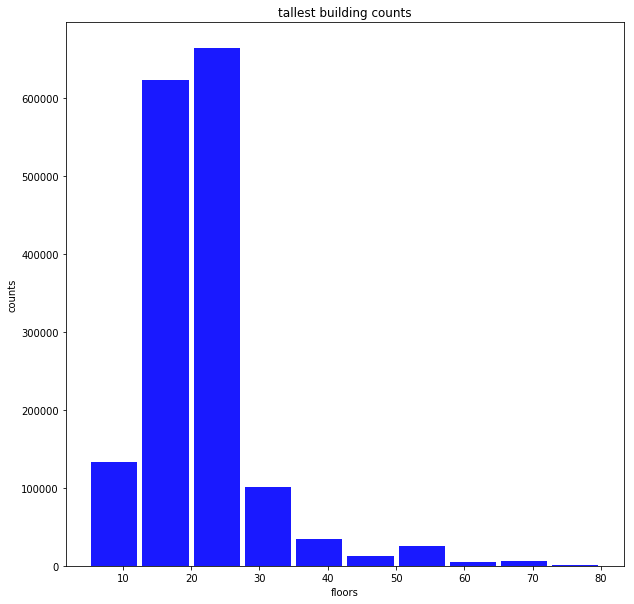

In [86]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'tallest building counts', xlabel = 'floors', ylabel='counts')
ax.hist(data.tallest_building_in_sites.dropna(), alpha=0.9, color='blue', rwidth=0.9)

In [13]:
address_tallest = pd.DataFrame(data.groupby(['ci_ad','gun_ad']).tallest_building_in_sites.mean())
data.loc[data.tallest_building_in_sites.isnull()==True] #ci_ad가 11, gun_ad가 215로 그 주소의 평균값사용#np.where(data.lowest_building_in_sites.isnull()==True, address_lowest.loc[data.address_by_law][0], data.lowest_building_in_sites)
data.tallest_building_in_sites = np.where(data.tallest_building_in_sites.isnull()==True, 23, data.tallest_building_in_sites)

# - Lowest Building

(array([249640., 648125., 545821., 106709.,  37576.,   4924.,   9760.,
          1207.,      0.,   1604.]),
 array([ 1. ,  7.9, 14.8, 21.7, 28.6, 35.5, 42.4, 49.3, 56.2, 63.1, 70. ]),
 <a list of 10 Patch objects>)

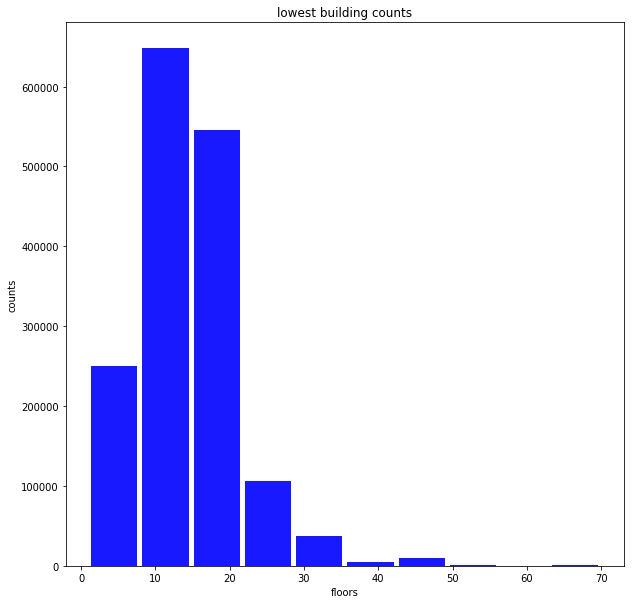

In [16]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'lowest building counts', xlabel = 'floors', ylabel='counts')
ax.hist(data.lowest_building_in_sites.dropna(), alpha=0.9, color='blue', rwidth=0.9)

In [14]:
address_lowest = pd.DataFrame(data.groupby(['ci_ad','gun_ad']).lowest_building_in_sites.mean())
data.loc[data.lowest_building_in_sites.isnull()==True] #ci_ad가 11, gun_ad가 215로 그 주소의 평균값사용#np.where(data.lowest_building_in_sites.isnull()==True, address_lowest.loc[data.address_by_law][0], data.lowest_building_in_sites)
data.lowest_building_in_sites = np.where(data.lowest_building_in_sites.isnull()==True, 15, data.lowest_building_in_sites)


- Roomcount

(array([3.242000e+03, 3.437500e+04, 2.499550e+05, 1.088408e+06,
        0.000000e+00, 2.085960e+05, 1.852200e+04, 1.528000e+03,
        3.800000e+01, 1.600000e+01]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

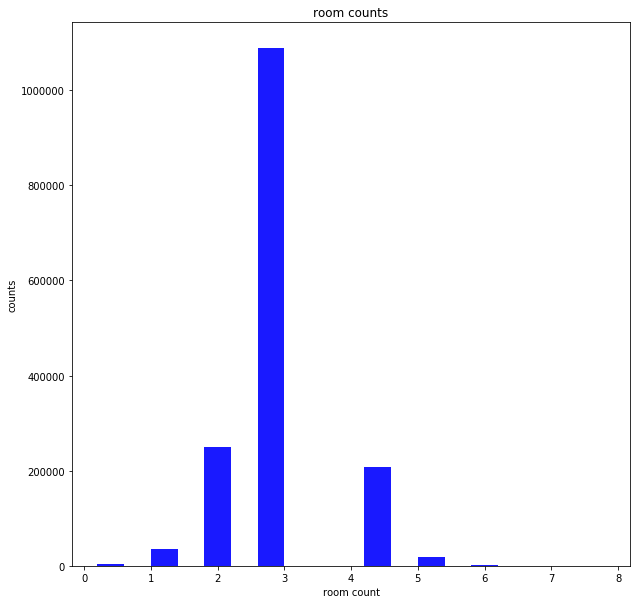

In [152]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'room counts', xlabel = 'room count', ylabel='counts')
ax.hist(data.room_count.dropna(), alpha=0.9, color='blue', rwidth=0.5)

In [253]:
data.groupby(['room_count']).exclusive_use_area.describe()

,count,mean,std,min,25%,50%,75%,max
room_count,,,,,,,,
0.0,3242.0,104.135763,2.423398e+01,47.7900,84.3657,114.23,118.2500,236.9000
1.0,34375.0,36.355866,7.826239e+00,16.3960,30.5800,36.16,41.3000,189.6100
2.0,249955.0,51.633993,9.797616e+00,28.7900,43.7900,49.94,59.6700,197.6500
3.0,1088408.0,76.757178,1.560732e+01,28.8000,59.9600,84.63,84.9600,244.7500
4.0,208596.0,125.315432,2.029974e+01,59.3900,114.7520,121.09,134.2500,269.6800
5.0,18522.0,165.348904,2.885614e+01,84.9024,147.8950,161.75,179.4912,295.4340
6.0,1528.0,191.375814,1.592528e+01,150.0480,185.2300,192.03,196.7000,266.8181
7.0,38.0,246.170789,4.858288e+00,243.2300,243.9600,244.91,245.2000,262.4200
8.0,16.0,234.080000,5.870763e-14,234.0800,234.0800,234.08,234.0800,234.0800


In [15]:
from scipy.stats import norm
#전용면적 기준으로 방수 대입
def room_count_idx(area):
    room_idx = np.argmax([norm.pdf(area,104,24), norm.pdf(area,36.3,7.8),norm.pdf(area, 51.6,9.8),norm.pdf(area,76.7,15.6),
                         norm.pdf(area,125.3,20), norm.pdf(area,165.3,29), norm.pdf(area,191.4,16),norm.pdf(area,246,4.8),
                         norm.pdf(area,234,0.000005)])
    return room_idx
data.loc[data.room_count.isnull()==True,'room_count']= data.loc[data.room_count.isnull()==True].exclusive_use_area.apply(room_count_idx)


# - Bathroom count

(array([3.24200e+03, 0.00000e+00, 6.64085e+05, 0.00000e+00, 9.29363e+05,
        0.00000e+00, 7.65300e+03, 0.00000e+00, 3.36000e+02, 1.00000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

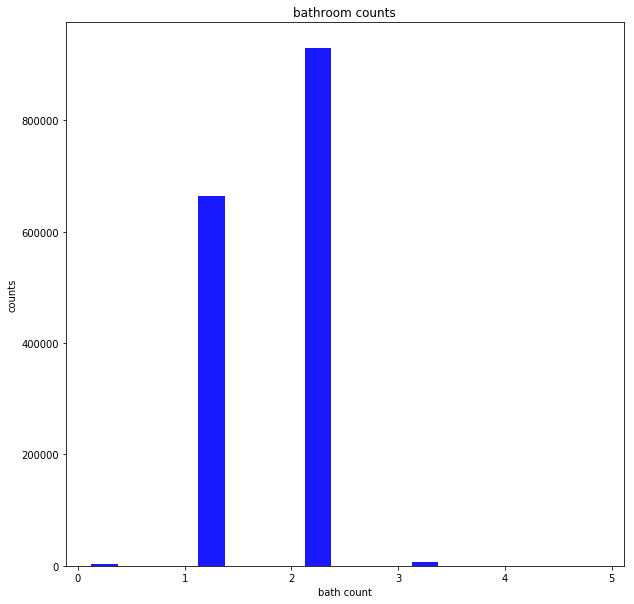

In [19]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'bathroom counts', xlabel = 'bath count', ylabel='counts')
ax.hist(data.bathroom_count.dropna(), alpha=0.9, color='blue', rwidth=0.5)

In [154]:
data.bathroom_count.value_counts()

2.0    929363
1.0    664085
3.0      7653
0.0      3242
4.0       336
5.0         1
Name: bathroom_count, dtype: int64

In [59]:
data.groupby(['bathroom_count']).exclusive_use_area.describe()

,count,mean,std,min,25%,50%,75%,max
bathroom_count,,,,,,,,
0.0,3242.0,104.135763,24.233982,47.790,84.3657,114.230,118.250,236.9000
1.0,664085.0,58.369827,13.778395,16.396,49.8000,59.730,59.990,197.6500
2.0,929363.0,93.573205,24.209541,28.800,84.7100,84.960,103.110,267.1009
3.0,7653.0,183.742445,39.977080,71.350,162.8290,177.990,215.640,285.8600
4.0,336.0,223.287950,37.788794,150.210,219.8200,244.543,244.628,295.4340
5.0,1.0,239.700000,NaN,239.700,239.7000,239.700,239.700,239.7000


In [60]:
data.groupby(['room_count']).bathroom_count.describe()

,count,mean,std,min,25%,50%,75%,max
room_count,,,,,,,,
0.0,3242.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1.0,34375.0,1.001745,0.041743,1.0,1.0,1.0,1.0,2.0
2.0,249955.0,1.016947,0.129073,1.0,1.0,1.0,1.0,2.0
3.0,1088408.0,1.653749,0.478561,1.0,1.0,2.0,2.0,4.0
4.0,208596.0,1.991908,0.222926,1.0,2.0,2.0,2.0,5.0
5.0,18522.0,2.139186,0.352027,2.0,2.0,2.0,2.0,4.0
6.0,1528.0,2.128272,0.351681,2.0,2.0,2.0,2.0,4.0
7.0,38.0,2.973684,0.162221,2.0,3.0,3.0,3.0,3.0
8.0,16.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [16]:
def bathroom_idx(room_count, area):
    if room_count ==0:
        return 0
    elif room_count ==1 or room_count==2:
        return 1
    elif room_count ==4 or room_count==5 or room_count==6:
        return 2
    elif room_count==7 or room_count==8:
        return 3
    elif room_count ==3 and area >=83.7:
        return 2
    elif room_count ==3 and area <83.7:
        return 1

In [17]:
data.loc[data.bathroom_count.isnull()==True,'bathroom_count']=data.loc[data.bathroom_count.isnull()==True].loc[:,['room_count','exclusive_use_area']].apply(lambda x: bathroom_idx(x['room_count'],x['exclusive_use_area']), axis =1)

# front_door_structure 처리            

In [92]:
data.front_door_structure.value_counts()

stairway    1149278
corridor     415985
mixed         26154
-                22
Name: front_door_structure, dtype: int64

In [24]:
data.front_door_structure.isnull().sum()

13937

In [23]:
data.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price',
       'ci_ad', 'gun_ad', 'eup_ad', 'li_ad'],
      dtype='object')

In [18]:
data_front_nan = data.loc[data.front_door_structure.isnull()==True]
data_front_nan.groupby(['tallest_building_in_sites']).size()

tallest_building_in_sites
10.0     171
13.0     179
15.0    1652
16.0     307
17.0     237
18.0     245
19.0     244
20.0     770
21.0     135
22.0     415
23.0     220
24.0     197
25.0     573
26.0     101
27.0      55
28.0     251
31.0      96
32.0     495
33.0    1011
34.0     120
35.0     682
37.0    1646
40.0     362
42.0     133
44.0     114
46.0       1
55.0      23
58.0     655
60.0    2847
dtype: int64

In [20]:
data_front_nan.groupby(['year_of_completion']).size()

year_of_completion
1982      97
1983      32
1986     293
1988     237
1989     179
1992     324
1993      21
1995     158
1996     379
1997      22
1998     131
1999     430
2000     391
2001     430
2002     106
2003     297
2004    1354
2006    1367
2007    1189
2008    4575
2009     521
2010     789
2011     542
2013      66
2017       7
dtype: int64

tallest가 30층 이상 건물은 stairway

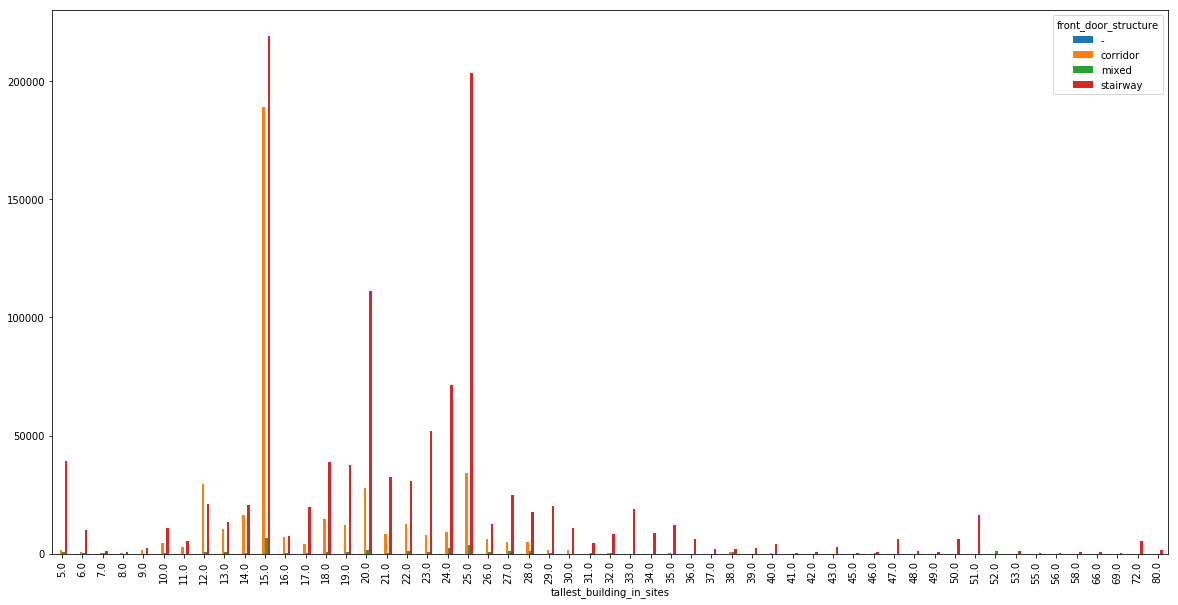

In [36]:
tall_front = pd.DataFrame(data.groupby(['tallest_building_in_sites', 'front_door_structure']).size().unstack(fill_value=0))
tall_front.plot(kind = 'bar', figsize=(20,10))

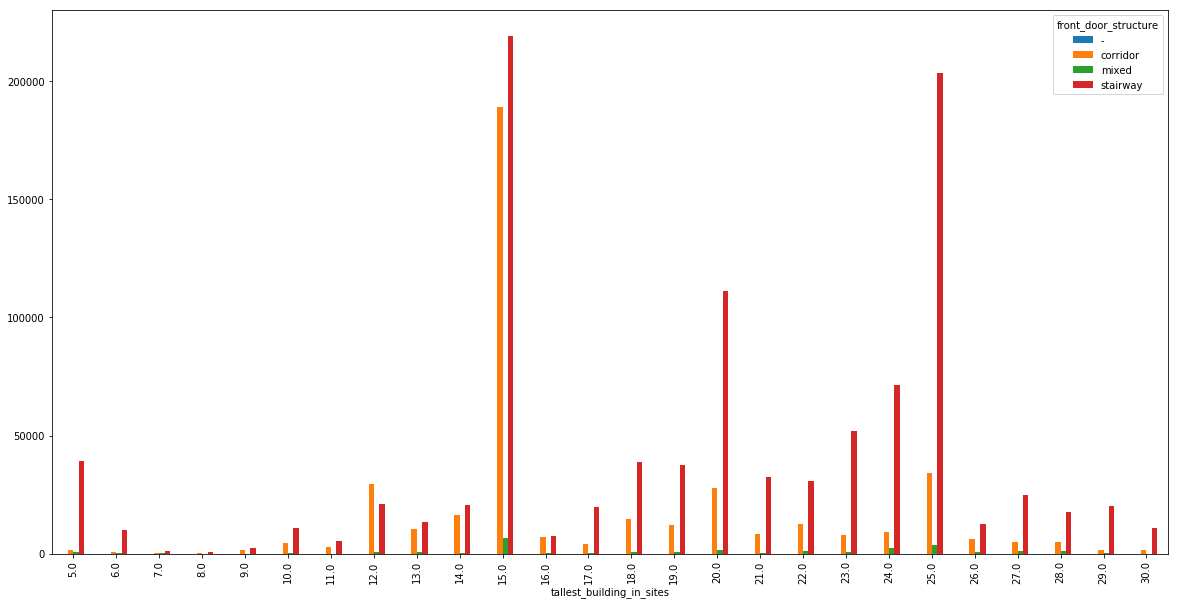

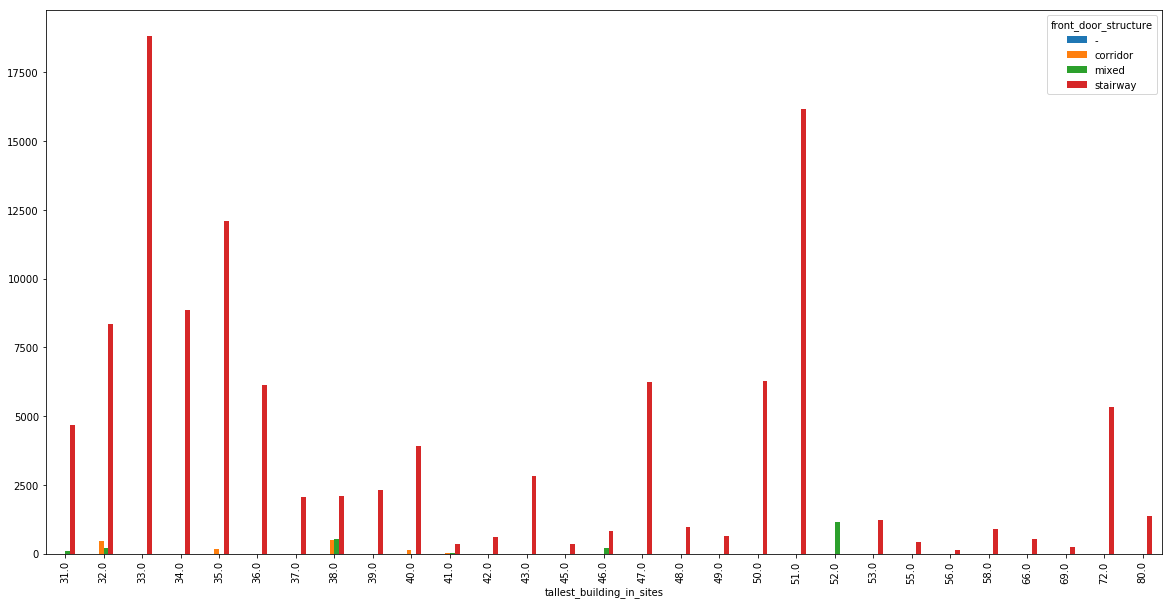

In [19]:
tall_front_30 = pd.DataFrame(data.loc[data.tallest_building_in_sites <=30].groupby(['tallest_building_in_sites', 'front_door_structure']).size().unstack(fill_value=0))
tall_front_30.plot(kind = 'bar', figsize=(20,10))
tall_front_30 = pd.DataFrame(data.loc[data.tallest_building_in_sites >30].groupby(['tallest_building_in_sites', 'front_door_structure']).size().unstack(fill_value=0))
tall_front_30.plot(kind = 'bar', figsize=(20,10))

In [20]:
len(data_front_nan.loc[data_front_nan.tallest_building_in_sites > 30])
data.loc[(data.front_door_structure.isnull()==True)&(data.tallest_building_in_sites >30),'front_door_structure'] = data.loc[(data.front_door_structure.isnull()==True)&(data.tallest_building_in_sites >30),'front_door_structure'].fillna('stairway')

In [20]:
np.percentile(data.loc[data.front_door_structure =='stairway'].exclusive_use_area,10)

59.76270000000001

In [21]:
data.groupby(['front_door_structure']).exclusive_use_area.describe()

,count,mean,std,min,25%,50%,75%,max
front_door_structure,,,,,,,,
-,22.0,44.182273,36.689711,36.360,36.36,36.360,36.360,208.450
corridor,415985.0,58.144588,16.238421,16.396,49.08,59.390,59.980,177.690
mixed,26154.0,81.468072,30.422564,18.000,59.72,84.200,84.975,223.760
stairway,1157463.0,87.075314,27.298395,16.536,67.83,84.891,84.994,295.434


In [87]:
data_front_nan.exclusive_use_area.describe()

count    2554.000000
mean       57.145176
std        11.861404
min        28.246000
25%        55.720000
50%        59.900000
75%        59.970000
max        82.265000
Name: exclusive_use_area, dtype: float64

In [21]:
data.loc[(data.front_door_structure.isnull()==True)&(data.exclusive_use_area >84),'front_door_structure'] = data.loc[(data.front_door_structure.isnull()==True)&(data.exclusive_use_area >84),'front_door_structure'].fillna('stairway')

exclusive_use_area를 front_door별로

(16.396, 295.434)

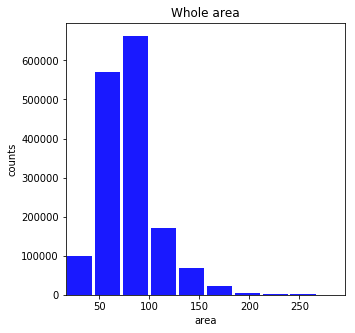

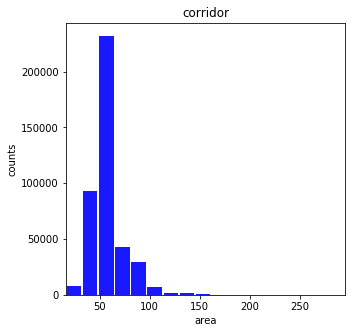

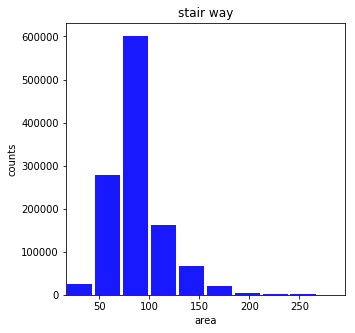

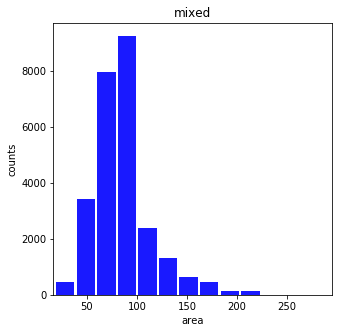

In [23]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'Whole area', xlabel = 'area', ylabel='counts')
ax.hist(data.exclusive_use_area.dropna(), alpha=0.9, color='blue',rwidth=0.9
       )
plt.xlim([min(data.exclusive_use_area),max(data.exclusive_use_area)])
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'corridor', xlabel = 'area', ylabel='counts')
ax.hist(data.loc[data.front_door_structure=='corridor'].exclusive_use_area.dropna(), alpha=0.9, color='blue',rwidth=0.9,
       )
plt.xlim([min(data.exclusive_use_area),max(data.exclusive_use_area)])
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'stair way', xlabel = 'area', ylabel='counts')
ax.hist(data.loc[data.front_door_structure=='stairway'].exclusive_use_area.dropna(), alpha=0.9, color='blue',rwidth=0.9,
       )
plt.xlim([min(data.exclusive_use_area),max(data.exclusive_use_area)])
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'mixed', xlabel = 'area', ylabel='counts')
ax.hist(data.loc[data.front_door_structure=='mixed'].exclusive_use_area.dropna(), alpha=0.9, color='blue',rwidth=0.9,
       )
plt.xlim([min(data.exclusive_use_area),max(data.exclusive_use_area)])

In [82]:
pd.DataFrame(data.groupby(['year_of_completion', 'front_door_structure']).size().unstack(fill_value=0))

front_door_structure,-,corridor,mixed,stairway
year_of_completion,,,,
1962,21,107,0,95
1966,0,0,0,44
1968,0,39,0,76
1969,0,100,0,0
1970,0,25,0,307
1971,0,1014,3,1147
1972,0,55,47,0
1973,0,0,0,291
1974,0,202,127,1742


In [22]:
data.loc[(data.front_door_structure.isnull()==True)&(data.year_of_completion >=2006),'front_door_structure'] = data.loc[(data.front_door_structure.isnull()==True)&(data.year_of_completion >=2006),'front_door_structure'].fillna('stairway')

In [23]:
data.loc[(data.front_door_structure.isnull()==True)&(data.exclusive_use_area <=60),'front_door_structure'] = data.loc[(data.front_door_structure.isnull()==True)&(data.exclusive_use_area <=60),'front_door_structure'].fillna('stairway')

In [24]:
def front_idx(area):
    front_idx = np.argmax([norm.pdf(area,58.144,16.24), norm.pdf(area,81.46,30.42),norm.pdf(area, 87.11,27.32)])
    if front_idx == 0:
        return 'corridor'
    elif front_idx == 1:
        return 'mixed'
    elif front_idx == 2:
        return 'stairway'
    
data.loc[data.front_door_structure.isnull()==True,'front_door_structure']= data.loc[data.front_door_structure.isnull()==True].exclusive_use_area.apply(front_idx)

front_door가 -인 것들 바꾸기

In [28]:
data.loc[data.front_door_structure =='-']

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,ci_ad,gun_ad,eup_ad,li_ad
318979,318979,34724,0,200809,1~10,1962,36.36,5,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,15000000,26,170,102,00
438719,438719,34724,0,200910,11~20,1962,36.36,2,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,21000000,26,170,102,00
685361,685362,6198,1,201204,11~20,2003,208.45,39,37.518631,126.939618,...,269.72,1,4.0,3.0,-,1900000000,11,560,110,00
696800,696801,34724,0,201206,11~20,1962,36.36,5,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,20000000,26,170,102,00
702933,702934,34724,0,201207,1~10,1962,36.36,4,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,21000000,26,170,102,00
762312,762313,34724,0,201304,11~20,1962,36.36,1,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,22000000,26,170,102,00
913481,913486,34724,0,201406,1~10,1962,36.36,3,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,25000000,26,170,102,00
971272,971277,34724,0,201410,21~31,1962,36.36,1,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,25000000,26,170,102,00
971273,971278,34724,0,201410,21~31,1962,36.36,5,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,23000000,26,170,102,00
1005786,1005792,34724,0,201501,21~31,1962,36.36,1,35.127602,129.039993,...,39.67,1104,2.0,1.0,-,23000000,26,170,102,00


In [25]:
data.loc[(data.front_door_structure=='-')&(data.exclusive_use_area>80),'front_door_structure'] = 'stairway'

In [26]:
data.loc[(data.front_door_structure=='-')&(data.exclusive_use_area<80),'front_door_structure'] =data.loc[(data.front_door_structure=='-')&(data.exclusive_use_area<80)].exclusive_use_area.apply(front_idx) 

In [27]:
data.front_door_structure.value_counts()

stairway    1162809
corridor     416413
mixed         26154
Name: front_door_structure, dtype: int64

# total_parking_capacity_in_site

-parking_capa가 household수와 coef가 0.9로 매우 높음

-household수와 regression으로 설명력이 80프로 이상으로 좋음

-regression으로 예측해서 결측치 채움

In [32]:
data.total_parking_capacity_in_site.describe()

count    1.513192e+06
mean     1.348404e+03
std      1.493572e+03
min      0.000000e+00
25%      4.120000e+02
50%      8.190000e+02
75%      1.651000e+03
max      9.766000e+03
Name: total_parking_capacity_in_site, dtype: float64

In [136]:
data.iloc[:,:20].head(10)

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,tallest_building_in_sites,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,individual,gas,91120,65.63
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,1111017100,163.0,136,1,8.0,4.0,individual,gas,91119,61.39
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,1111017400,902.0,585,5,14.0,9.0,individual,gas,8430,72.36
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,individual,gas,5839,87.30
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,1111017400,902.0,919,7,15.0,11.0,individual,gas,5836,127.74
5,5,2815,1,200601,11~20,2000,84.92,9,37.575381,126.960804,1111018700,1365.0,964,12,23.0,10.0,individual,gas,5831,109.88
6,6,2815,1,200601,11~20,2000,60.00,13,37.575381,126.960804,1111018700,1365.0,964,12,23.0,10.0,individual,gas,5833,84.33
7,7,9867,1,200601,11~20,2005,84.76,10,37.559200,127.019503,1114016200,652.0,461,9,23.0,6.0,individual,gas,11862,104.30
8,8,2818,1,200601,11~20,1999,84.88,18,37.555060,127.014495,1114016200,2091.0,2282,19,20.0,8.0,individual,gas,5843,107.65
9,9,2817,1,200601,11~20,2002,59.94,12,37.549828,127.009284,1114016200,4329.0,5150,42,18.0,11.0,individual,gas,5842,85.90


In [28]:
data_parking = data.loc[data.total_parking_capacity_in_site.isnull()==False]
print(np.corrcoef(data_parking.total_parking_capacity_in_site, data_parking.total_household_count_in_sites))
print(np.corrcoef(data_parking.total_parking_capacity_in_site, data_parking.apartment_building_count_in_sites))
np.corrcoef(data.apartment_building_count_in_sites, data.total_household_count_in_sites)

[[1.         0.90227012]
 [0.90227012 1.        ]]
[[1.        0.7764552]
 [0.7764552 1.       ]]


array([[1.       , 0.8688414],
       [0.8688414, 1.       ]])

In [29]:
from sklearn.linear_model import LinearRegression
train_x = data_parking.total_household_count_in_sites.to_frame()
train_y = data_parking.total_parking_capacity_in_site.to_frame()
lr = LinearRegression().fit(train_x, train_y)
print(lr.coef_, lr.intercept_)
print(lr.score(train_x,train_y))
y_pred = lr.predict(train_x)
test_x = data.loc[data.total_parking_capacity_in_site.isnull()==True].total_household_count_in_sites.to_frame()


[[1.17612892]] [-71.32682926]
0.814091361390332


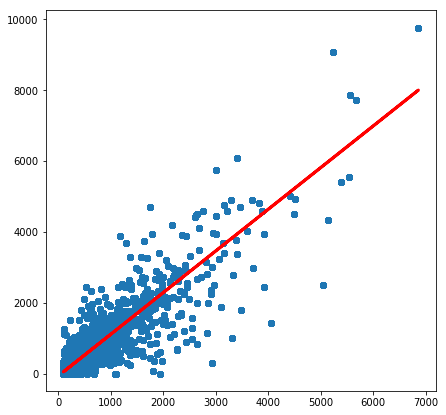

In [158]:
plt.figure(figsize=(7,7))
plt.scatter(data.total_household_count_in_sites,data.total_parking_capacity_in_site)
plt.plot(train_x,y_pred, linewidth = 3, color = 'red')
plt.show()

In [30]:
parking_y = lr.predict(test_x)

In [31]:
parking_size = np.array(parking_y.reshape(1,-1)).round()[0]
data.loc[data.total_parking_capacity_in_site.isnull()==True,'total_parking_capacity_in_site'] = parking_size

# Subway 전처리

In [176]:
subway.head()

,station_id,latitude,longitude,subway_line,address_by_law
0,1,37.555729,126.972145,"1,4,KJ,AP",1.114012e+09
1,2,37.565624,126.976936,"1,2",1.114017e+09
2,3,37.570169,126.983099,1,1.111013e+09
3,4,37.571570,126.991895,"1,3,5",1.111016e+09
4,5,37.570988,127.001921,1,1.111016e+09


In [38]:
subway.isnull().sum()

station_id        0
latitude          0
longitude         0
subway_line       0
address_by_law    0
dtype: int64

In [32]:
print(subway.loc[subway.address_by_law.isnull() == True])
#동대문, 교대, 대방, 망우, 도봉, 개화산, 청구, 장승배기, 부산 남산역
subway.loc[subway.address_by_law.isnull() == True,'address_by_law']=np.array([1111016300, 1165010800, 1156013200, 1126010200, 1132010800,1150010900,1114016200,1159010200,2641010400])

     station_id   latitude   longitude subway_line  address_by_law
5             6  37.571256  127.009080         1,4             NaN
31           32  37.493682  127.013705         2,3             NaN
113         115  37.513392  126.926407           1             NaN
133         135  37.599708  127.092081       KC,KJ             NaN
154         300  37.679441  127.045521           1             NaN
157         324  37.572370  126.806174           5             NaN
175         342  37.560205  127.013875         5,6             NaN
245         413  37.504905  126.939191           7             NaN
309         624  35.265156  129.092406          B1             NaN


# Scool 전처리

In [184]:
school.tail()

,school_code,latitude,longitude,school_class,operation_type,highschool_type,gender,foundation_date,address_by_law
1916,S020002000,35.176596,129.127557,high,public,general,male,2007.8.24,2635010400
1917,S020002005,35.080343,128.900075,high,public,general,both,2009.3.1,2644010400
1918,S020002008,35.327974,129.166824,high,public,general,both,2009.3.1,2671025628
1919,S020002070,35.322088,129.170581,high,public,general,both,2015.3.1,2671025628
1920,S020002096,35.116522,128.988951,high,public,objective,both,2011.5.2,2638010200


In [183]:
school.isnull().sum()

school_code           0
latitude              0
longitude             0
school_class          0
operation_type        0
highschool_type    1459
gender                0
foundation_date       0
address_by_law        0
dtype: int64

# 서울, 부산 아파트 분포 확인

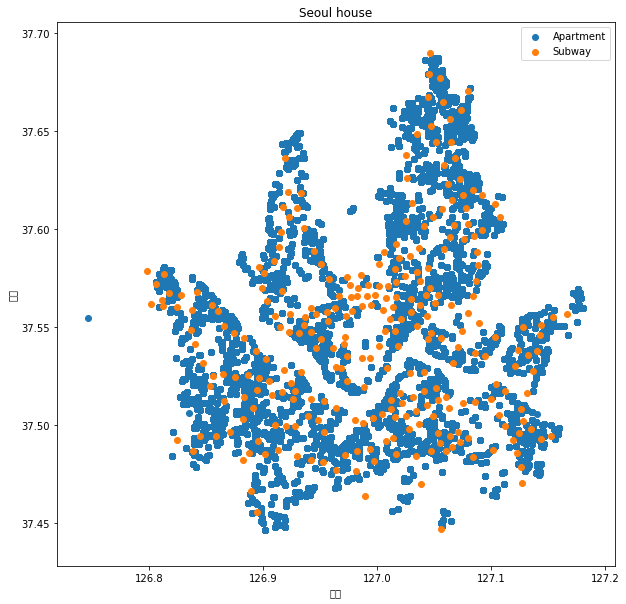

In [41]:
mask = np.zeros(data.shape[0], dtype = np.bool)
mask[np.where(data.city==1)[0]] = 1
mask_1 = np.zeros(subway.shape[0], dtype = np.bool)
mask_1[np.where(subway.latitude >= min(data[mask].latitude))] =1
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1)
ax.set(title = 'Seoul house', xlabel = '경도', ylabel='위도')
plt.scatter(x= data[mask].longitude,
             y= data[mask].latitude, label='Apartment')
plt.scatter(subway[mask_1].longitude, subway[mask_1].latitude, label='Subway')
#plt.scatter(school.loc[school.latitude >=min(data[mask].latitude)].longitude,
 #          school.loc[school.latitude >=min(data[mask].latitude)].latitude, label='school')

plt.legend(loc='upper right')


plt.show()

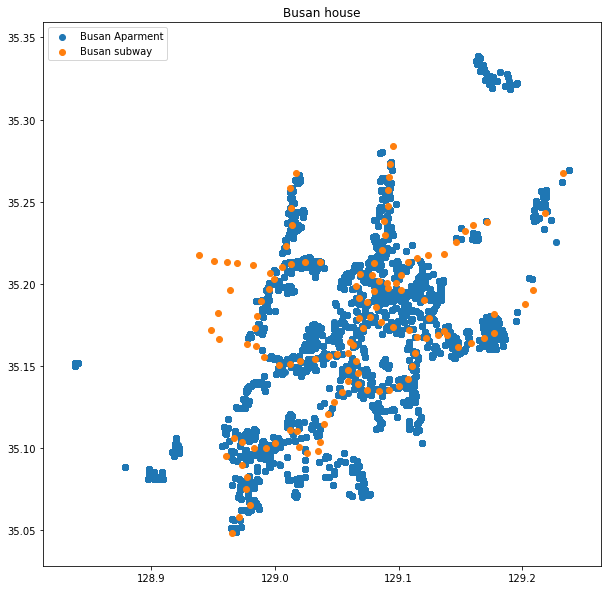

In [49]:
mask = np.zeros(data.shape[0], dtype = np.bool)
mask[np.where(data.city==0)[0]] = 1
mask_1 = np.zeros(subway.shape[0], dtype = np.bool)
mask_1[np.where(subway.latitude <= max(data[mask].latitude))] =1

for city in np.unique(data.city):
    mask[np.where(data.city==0)[0]] = 1
plt.figure(figsize = (10,10))
plt.scatter(x= data[mask].longitude,
             y= data[mask].latitude, label='Busan Aparment')
plt.scatter(subway[mask_1].longitude, subway[mask_1].latitude, label='Busan subway')
plt.legend()
plt.title('Busan house')
plt.show()

# EDA

In [35]:
data.columns

Index(['key', 'apartment_id', 'city', 'transaction_year_month',
       'transaction_date', 'year_of_completion', 'exclusive_use_area', 'floor',
       'latitude', 'longitude', 'address_by_law',
       'total_parking_capacity_in_site', 'total_household_count_in_sites',
       'apartment_building_count_in_sites', 'tallest_building_in_sites',
       'lowest_building_in_sites', 'heat_type', 'heat_fuel', 'room_id',
       'supply_area', 'total_household_count_of_area_type', 'room_count',
       'bathroom_count', 'front_door_structure', 'transaction_real_price',
       'ci_ad', 'gun_ad', 'eup_ad', 'li_ad'],
      dtype='object')

In [43]:
train = data.loc[data.transaction_real_price >0]
test = data.loc[data.transaction_real_price ==0]

# 도시별 가격 분포

C:\Users\user\PYTHON\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


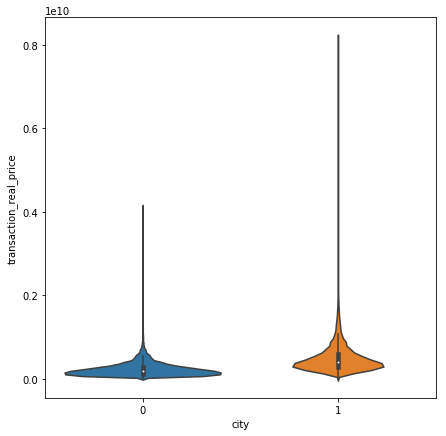

In [38]:
plt.figure(figsize=(7,7))
sns.violinplot(x="city", y="transaction_real_price", data=train)
plt.show()

C:\Users\user\PYTHON\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


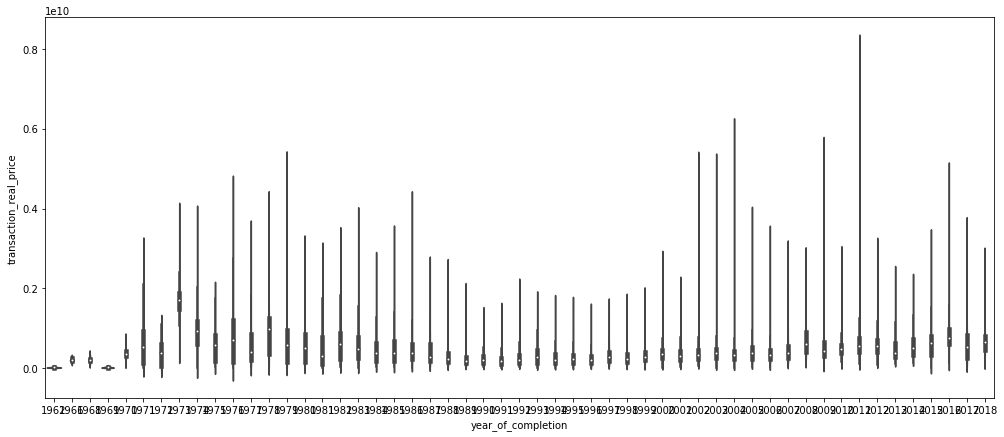

In [44]:
plt.figure(figsize=(17,7))
sns.violinplot(x="year_of_completion", y="transaction_real_price", data=train)
plt.title('year')
plt.show()

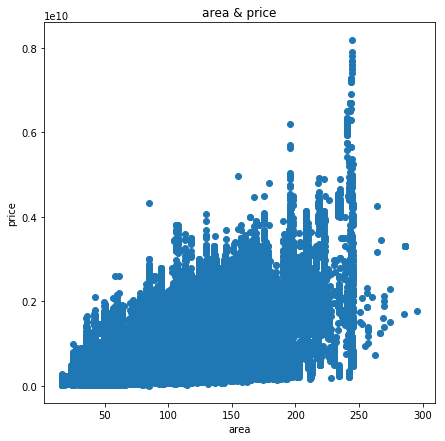

In [45]:
plt.figure(figsize=(7,7))
plt.scatter(train.exclusive_use_area, train.transaction_real_price)
plt.title('area & price')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

In [46]:
subway.columns

Index(['station_id', 'latitude', 'longitude', 'subway_line', 'address_by_law'], dtype='object')

In [64]:
subway.index

RangeIndex(start=0, stop=405, step=1)

가까운 지하철거리, 지하철 id, 환승역 유무, 역세권 지하철역 개수, 2차역세권 지하철 개수,유클리디언 distance로 하면

위도 1도는 110km, 경도 1도는 88km

In [33]:
cluster= pd.DataFrame()
house_loc = np.array(data.loc[:,['latitude','longitude']])*[110000,88000]
for i in subway.index:
    x=np.array([subway.loc[i,'latitude'], subway.loc[i,'longitude']])*[110000,88000]
    dist=house_loc-x
    cluster['Distance_{}'.format(i)]=np.linalg.norm(dist,axis=1,ord=2)

In [35]:
closest_station = cluster.idxmin(axis=1)
closest_station_dist = cluster.min(axis=1)

In [39]:
#500미터 이내 1차역세권 내 지하철 개수
def count_1(x):
    return len([1 for i in x if i<=500])
cluster_1_count = cluster.iloc[:,:-1].apply(count_1, axis=1)

In [40]:
#1000미터 이내 2차역세권 내 지하철 개수
def count_2(x):
    return len([1 for i in x if i<=1000])
cluster_2_count = cluster.iloc[:,:-1].apply(count_2, axis=1)

In [41]:
#200미터 이내 초역세권 내 지하철 개수
def count_0(x):
    return len([1 for i in x if i<=200])
cluster_0_count = cluster.iloc[:,:-1].apply(count_0, axis=1)

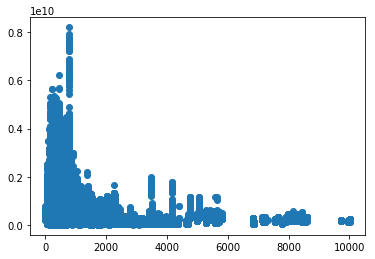

In [55]:
plt.scatter(closest_station_dist[:1601458], train.transaction_real_price)
plt.show()

In [69]:
subway.loc[int(closest_station.str.split("_").str[1][0]),'station_id']

102

In [80]:
cluster.head()

,Distance_0,Distance_1,Distance_2,Distance_3,Distance_4,Distance_5,Distance_6,Distance_7,Distance_8,Distance_9,...,Distance_395,Distance_396,Distance_397,Distance_398,Distance_399,Distance_400,Distance_401,Distance_402,Distance_403,Distance_404
0,4143.755296,3034.563692,2300.442087,1745.172083,1654.175421,1795.669512,2398.035147,3165.511149,3932.517418,1993.316967,...,320770.823185,321422.269700,322895.833624,324102.165500,325430.887289,326550.162763,327352.415247,326911.763501,323319.832965,321955.959471
1,4143.755296,3034.563692,2300.442087,1745.172083,1654.175421,1795.669512,2398.035147,3165.511149,3932.517418,1993.316967,...,320770.823185,321422.269700,322895.833624,324102.165500,325430.887289,326550.162763,327352.415247,326911.763501,323319.832965,321955.959471
2,4583.422889,3650.849378,2948.941717,2181.003471,1493.383226,1106.896326,1044.912867,1852.519012,2667.660177,825.507638,...,319584.266558,320234.331202,321706.001369,322913.036267,324241.055655,325353.323859,326151.416541,325708.803733,322109.791331,320740.967927
3,4414.694762,3467.076333,2760.691894,1997.951859,1344.830566,1025.598259,1214.001427,2044.441352,2863.508795,876.640446,...,319679.565811,320329.998328,321802.174491,323009.022015,324337.229597,325451.385193,326250.611415,325808.536210,322211.484072,320844.050258
4,4414.694762,3467.076333,2760.691894,1997.951859,1344.830566,1025.598259,1214.001427,2044.441352,2863.508795,876.640446,...,319679.565811,320329.998328,321802.174491,323009.022015,324337.229597,325451.385193,326250.611415,325808.536210,322211.484072,320844.050258


In [82]:
closest_station_dist.head()

0    416.094400
1    416.094400
2    116.993563
3    300.855156
4    300.855156
dtype: float64

In [85]:
closest_station_dist

0           416.094400
1           416.094400
2           116.993563
3           300.855156
4           300.855156
5           273.744327
6           273.744327
7           507.446220
8           314.828615
9           298.198409
10          418.692486
11          418.692486
12          507.446220
13          507.446220
14          314.828615
15          418.692486
16          507.446220
17          298.198409
18          314.828615
19          507.446220
20          507.446220
21          298.198409
22          255.897359
23          349.057023
24          349.057023
25          349.057023
26          349.057023
27          349.057023
28          349.057023
29          349.057023
              ...     
1605346    2890.549946
1605347    1532.795955
1605348    1328.114512
1605349     372.591870
1605350     372.759280
1605351     923.335832
1605352    2315.943809
1605353     178.016935
1605354     489.903373
1605355     370.503234
1605356     416.114935
1605357    3404.378977
1605358    

In [86]:
data.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,ci_ad,gun_ad,eup_ad,li_ad
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,65.63,46,1.0,1.0,corridor,215000000,11,110,171,00
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,61.39,10,2.0,1.0,corridor,200000000,11,110,171,00
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,72.36,201,2.0,1.0,corridor,168000000,11,110,174,00
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,87.30,284,2.0,1.0,corridor,165000000,11,110,174,00
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,127.74,112,4.0,2.0,stairway,280000000,11,110,174,00


In [93]:
data.loc[data.apartment_id==5584]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price,ci_ad,gun_ad,eup_ad,li_ad
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,65.63,46,1.0,1.0,corridor,215000000,11,110,171,00
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,61.39,10,2.0,1.0,corridor,200000000,11,110,171,00
6708,6708,5584,1,200602,11~20,1999,47.43,7,37.585965,127.000231,...,65.63,46,1.0,1.0,corridor,235000000,11,110,171,00
10256,10256,5584,1,200602,1~10,1999,88.74,8,37.585965,127.000231,...,122.79,2,3.0,2.0,corridor,380000000,11,110,171,00
10257,10257,5584,1,200602,1~10,1999,65.78,6,37.585965,127.000231,...,91.02,14,3.0,1.0,corridor,310000000,11,110,171,00
80204,80204,5584,1,200609,1~10,1999,47.43,5,37.585965,127.000231,...,65.63,46,1.0,1.0,corridor,210000000,11,110,171,00
90995,90995,5584,1,200610,11~20,1999,50.49,3,37.585965,127.000231,...,69.86,28,2.0,1.0,corridor,210000000,11,110,171,00
90996,90996,5584,1,200610,11~20,1999,94.86,3,37.585965,127.000231,...,131.26,10,3.0,2.0,corridor,340000000,11,110,171,00
113476,113476,5584,1,200611,11~20,1999,65.78,8,37.585965,127.000231,...,91.02,14,3.0,1.0,corridor,352500000,11,110,171,00
137940,137940,5584,1,200612,1~10,1999,47.43,4,37.585965,127.000231,...,65.63,46,1.0,1.0,corridor,217000000,11,110,171,00
